#Importing Modules and Reading Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#Analyzing All Columns to Determine which can be Used in Prediction Model

In [169]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


## number of survived people

In [170]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [171]:
df['Survived'].isnull().sum().sum()

0

##by pclass

In [172]:
df['Pclass'].astype('object').describe()

,Pclass
count,891
unique,3
top,3
freq,491


In [127]:
df['Pclass'].isnull().sum().sum()

0

In [128]:
df_test['Pclass'].isnull().sum().sum()

0

<Axes: xlabel='Pclass'>

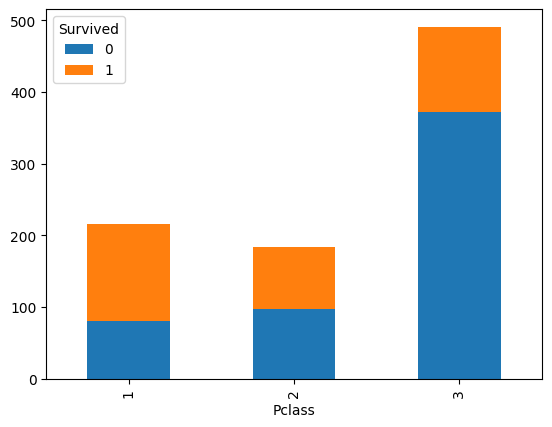

In [129]:
pd.crosstab(df['Pclass'],df['Survived']).plot.bar(stacked=True)

In [130]:
pd.crosstab(df['Pclass'],df['Survived'], normalize='index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


As can be seen from the graph and percentage distributions, as the level of ticket class (Pclass) decreases, the survival rate decreases. Therefore, this feature can be used in the prediction model.

##by gender

In [73]:
df['Sex'].describe()

,Sex
count,891
unique,2
top,male
freq,577


In [132]:
df['Sex'].isnull().sum().sum()

0

In [229]:
df_test['Sex'].isnull().sum().sum()

0

<Axes: xlabel='Sex'>

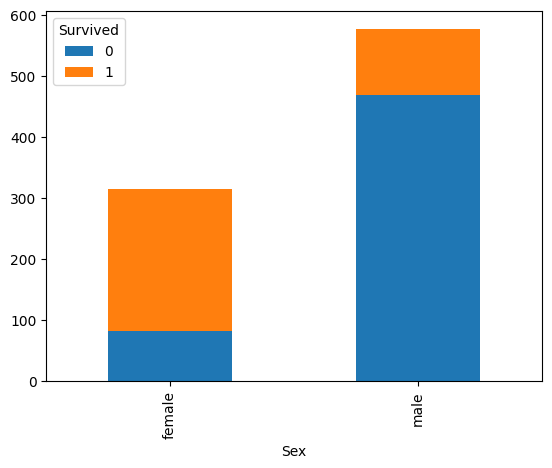

In [133]:
pd.crosstab(df['Sex'],df['Survived']).plot.bar(stacked=True)

In [134]:
pd.crosstab(df['Sex'],df['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


 As can be seen from the graph and percentage distributions, while most women survived, most men did not survive. Therefore, this feature can also be used for the prediction model.

##by age

In [5]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [6]:
df['Age'].isnull().sum().sum()

177

In [9]:
df_test['Age'].isnull().sum().sum()

86

As observed, many age values appear as NaN, meaning they are unknown. Instead of eliminating rows with these values or replacing them with the mean value, one could examine whether there is a relationship between these values and survival. If a relationship is found, these values can be used in predictions. Additionally, to reduce time complexity, the numerical variable 'age' will be converted into a categorical variable. The categories will be divided into four groups: 0–18 years old (children), 18–65 years old (adults), over 65 years old (elderly), and unknown age values.

In [232]:
def accurate(row):
    if row['Age'] < 	18:
        return 0
    elif row['Age'] < 65:
        return 1
    elif row['Age'] >= 65:
        return 2
    else:
        return 3

df['Age Updated'] = df.apply(lambda row: accurate(row), axis=1)
df_test['Age Updated'] = df_test.apply(lambda row: accurate(row), axis=1)

<Axes: xlabel='Age Updated'>

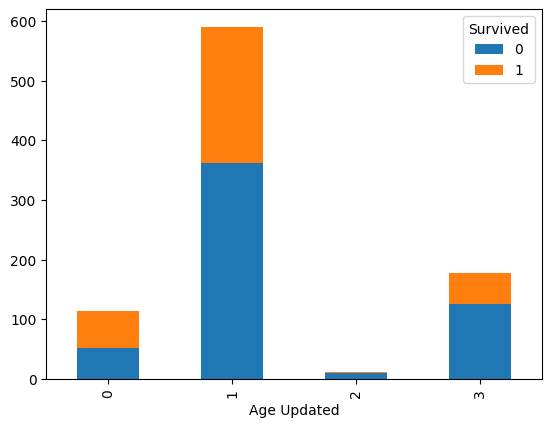

In [233]:
pd.crosstab(df['Age Updated'],df['Survived']).plot.bar(stacked=True)

In [234]:
pd.crosstab(df['Age Updated'],df['Survived'], normalize='index')

Survived,0,1
Age Updated,,
0,0.460177,0.539823
1,0.613559,0.386441
2,0.909091,0.090909
3,0.706215,0.293785


As can be seen from the graph and percentage distributions, the older the individuals are, the lower their survival rates. Additionally, individuals with unknown age values also have a low survival rate. Therefore, this feature can also be used in the prediction model.

##by SibSp

In [235]:
df['SibSp'].isnull().sum().sum()

0

In [236]:
df_test['SibSp'].isnull().sum().sum()

0

<Axes: xlabel='SibSp'>

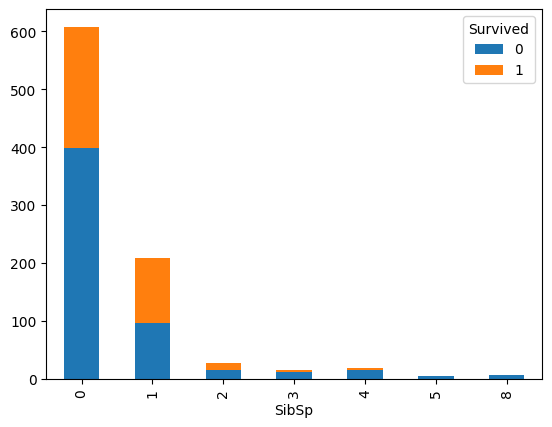

In [144]:
pd.crosstab(df['SibSp'],df['Survived']).plot.bar(stacked=True)

As can be seen from the graph, the number of individuals with SibSp values other than 0 and 1 is very small, which could lead to meaningless decision trees. Therefore, this feature will be adjusted to categorize individuals into two groups: those with siblings or spouses and those without.

In [237]:
def accurate(row):
    if row['SibSp'] == 0:
        return 0
    return 1

df['Having SibSp'] = df.apply(lambda row: accurate(row), axis=1)
df_test['Having SibSp'] = df_test.apply(lambda row: accurate(row), axis=1)

<Axes: xlabel='Having SibSp'>

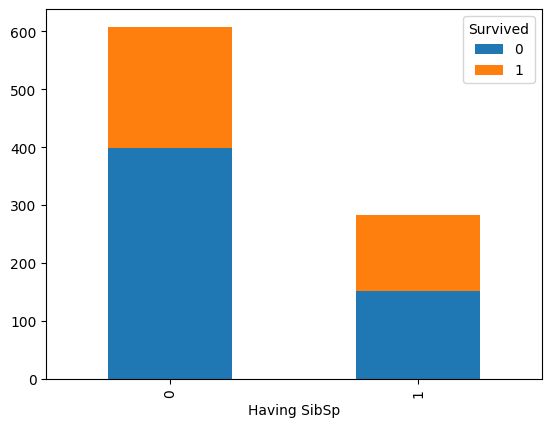

In [146]:
pd.crosstab(df['Having SibSp'],df['Survived']).plot.bar(stacked=True)

In [147]:
pd.crosstab(df['Having SibSp'],df['Survived'], normalize='index')

Survived,0,1
Having SibSp,,
0,0.654605,0.345395
1,0.533569,0.466431


Although the correlation is not as strong as with the features mentioned above, it can be said that individuals with siblings or spouses have a somewhat higher survival rate. Therefore, this feature will also be used in the prediction model.

##by Parch

In [148]:
df['Parch'].isnull().sum().sum()

0

In [149]:
df_test['Parch'].isnull().sum().sum()

0

<Axes: xlabel='Parch'>

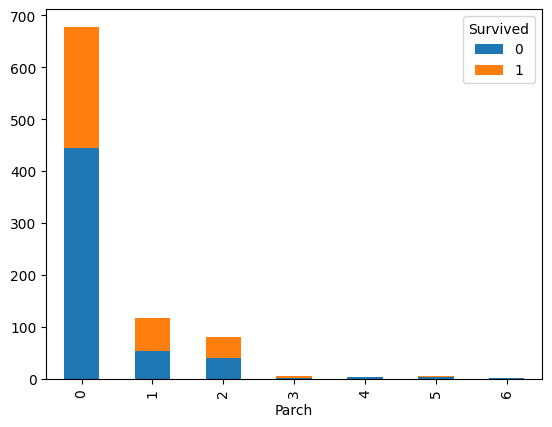

In [238]:
pd.crosstab(df['Parch'],df['Survived']).plot.bar(stacked=True)

Just like with the SibSp feature, the number of individuals with values other than 0 and 1 here is very low. Therefore, similar processing to what was done with SibSp will be applied here as well.

In [239]:
def accurate(row):
    if row['Parch'] == 0:
        return 0
    return 1

df['Having Parch'] = df.apply(lambda row: accurate(row), axis=1)
df_test['Having Parch'] = df_test.apply(lambda row: accurate(row), axis=1)

<Axes: xlabel='Having Parch'>

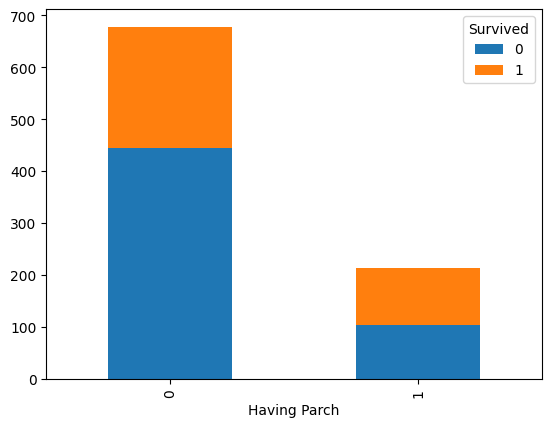

In [152]:
pd.crosstab(df['Having Parch'],df['Survived']).plot.bar(stacked=True)

In [153]:
pd.crosstab(df['Having Parch'],df['Survived'], normalize='index')

Survived,0,1
Having Parch,,
0,0.656342,0.343658
1,0.488263,0.511737


From the graph and percentage distributions, it can be seen that individuals with parents or children have a higher survival rate. Therefore, this feature can also be used in the prediction model.

##by fare

In [154]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [240]:
df['Fare'].isnull().sum().sum()

0

###Filling Fare Value of One Person who does not have Fare Value

In [241]:
df_test['Fare'].isnull().sum().sum()

1

In [242]:
df_test.shape[0]

418

In [244]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [245]:
df_test.shape[0]

418

##by fare (cont.)

<Axes: >

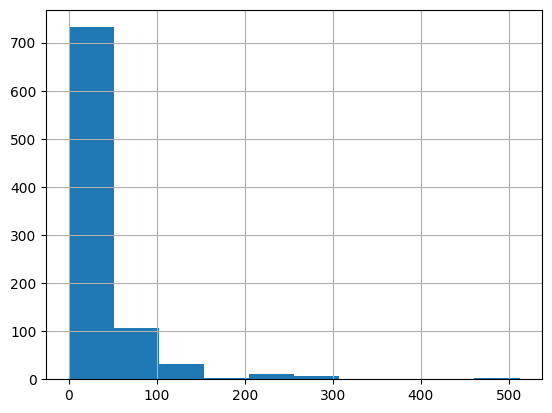

In [181]:
df['Fare'].hist()

From this graph, it can be seen that there are many individuals with fare values between 0 and 100, while there are very few individuals with fare values above 100.
 Therefore, this numerical variable will also be converted into a categorical variable. This conversion will be based on the percentile values specified in the describe() function above.

In [246]:
def accurate(row):
    if row['Fare'] <= 	7.910400:
        return 0
    elif row['Fare'] < 14.454200:
        return 1
    elif row['Fare'] < 31.000000:
        return 2
    else:
        return 3

df['Fare Updated'] = df.apply(lambda row: accurate(row), axis=1)
df_test['Fare Updated'] = df_test.apply(lambda row: accurate(row), axis=1)

<Axes: xlabel='Fare Updated'>

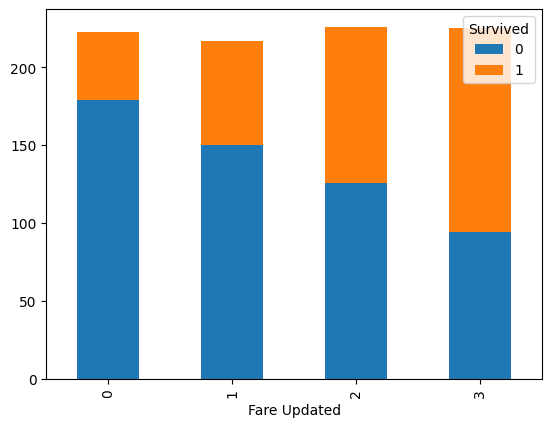

In [247]:
pd.crosstab(df['Fare Updated'],df['Survived']).plot.bar(stacked=True)

In [248]:
pd.crosstab(df['Fare Updated'],df['Survived'], normalize='index')

Survived,0,1
Fare Updated,,
0,0.802691,0.197309
1,0.691244,0.308756
2,0.557522,0.442478
3,0.417778,0.582222


From the graph and percentage distributions, it can be seen that as the fare increases, the survival rate also increases. Therefore, this feature can also be used in the prediction model.

The following three features will not be used in the prediction model. The Ticket and Cabin features have too many values and are categorical, making it difficult to build a meaningful prediction model based on them. Although the Embark feature shows a very weak correlation, in my personal opinion, there is no significant relationship between the port of embarkation and the survival rate. Therefore, this feature will also not be used.

##by ticket

In [98]:
df['Ticket'].value_counts()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


##by cabin

In [99]:
df['Cabin'].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


##by embarked

In [100]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


<Axes: xlabel='Embarked'>

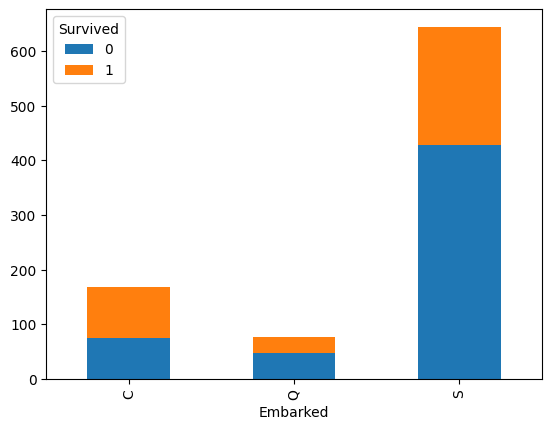

In [101]:
pd.crosstab(df['Embarked'],df['Survived']).plot.bar(stacked=True)

In [102]:
pd.crosstab(df['Embarked'],df['Survived'], normalize='index')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


#Splitting the Data into Independent and Dependent Variables

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [254]:
X_train_df = df[['Pclass','Sex','Age Updated','Having SibSp','Having Parch','Fare Updated']].copy()
X_pred = df_test[['Pclass','Sex','Age Updated','Having SibSp','Having Parch','Fare Updated']].copy()

In [255]:
X_train_df.head()

,Pclass,Sex,Age Updated,Having SibSp,Having Parch,Fare Updated
0,3,male,1,1,0,0
1,1,female,1,1,0,3
2,3,female,1,0,0,1
3,1,female,1,1,0,3
4,3,male,1,0,0,1


In [256]:
X_pred.head()

,Pclass,Sex,Age Updated,Having SibSp,Having Parch,Fare Updated
0,3,male,1,0,0,0
1,3,female,1,1,0,0
2,2,male,1,0,0,1
3,3,male,1,0,0,1
4,3,female,1,1,1,1


In [257]:
y_train_df = df[['Survived']].copy()

In [258]:
y_train_df.head()

,Survived
0,0
1,1
2,1
3,1
4,0


#One Hot Encoding

To use categorical variables in a decision tree algorithm, the one-hot encoding method should be applie

In [259]:
X_encoded_train_df = pd.get_dummies(X_train_df, columns=['Pclass','Sex','Age Updated','Having SibSp','Having Parch','Fare Updated'])

X_encoded_train_df.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age Updated_0,Age Updated_1,Age Updated_2,Age Updated_3,Having SibSp_0,Having SibSp_1,Having Parch_0,Having Parch_1,Fare Updated_0,Fare Updated_1,Fare Updated_2,Fare Updated_3
0,False,False,True,False,True,False,True,False,False,False,True,True,False,True,False,False,False
1,True,False,False,True,False,False,True,False,False,False,True,True,False,False,False,False,True
2,False,False,True,True,False,False,True,False,False,True,False,True,False,False,True,False,False
3,True,False,False,True,False,False,True,False,False,False,True,True,False,False,False,False,True
4,False,False,True,False,True,False,True,False,False,True,False,True,False,False,True,False,False


In [260]:
X_encoded_pred = pd.get_dummies(X_pred, columns=['Pclass','Sex','Age Updated','Having SibSp','Having Parch','Fare Updated'])

X_encoded_pred.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age Updated_0,Age Updated_1,Age Updated_2,Age Updated_3,Having SibSp_0,Having SibSp_1,Having Parch_0,Having Parch_1,Fare Updated_0,Fare Updated_1,Fare Updated_2,Fare Updated_3
0,False,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False
1,False,False,True,True,False,False,True,False,False,False,True,True,False,True,False,False,False
2,False,True,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False
3,False,False,True,False,True,False,True,False,False,True,False,True,False,False,True,False,False
4,False,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False


#Decision Tree

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded_train_df, y_train_df, random_state=42)

for i in range(1,11):
  clf_dt = DecisionTreeClassifier(max_depth=i)
  clf_dt = clf_dt.fit(X_train, y_train)
  y_pred = clf_dt.predict(X_test)
  print(str(i) + ': ' + str(accuracy_score(y_test, y_pred)))

1: 0.7847533632286996
2: 0.7802690582959642
3: 0.8071748878923767
4: 0.8161434977578476
5: 0.7982062780269058
6: 0.8116591928251121
7: 0.7937219730941704
8: 0.8026905829596412
9: 0.7982062780269058
10: 0.7982062780269058


Decision trees were tested with all maximum depths from 1 to 10, and the maximum depth that provided the best accuracy score was 4. Therefore, this value will be used in the prediction model.

#Prediction

In [263]:
clf_dt = DecisionTreeClassifier(max_depth=4)
clf_dt = clf_dt.fit(X_encoded_train_df, y_train_df)
y_pred_final = clf_dt.predict(X_encoded_pred)

#Visualization of the Decision Tree

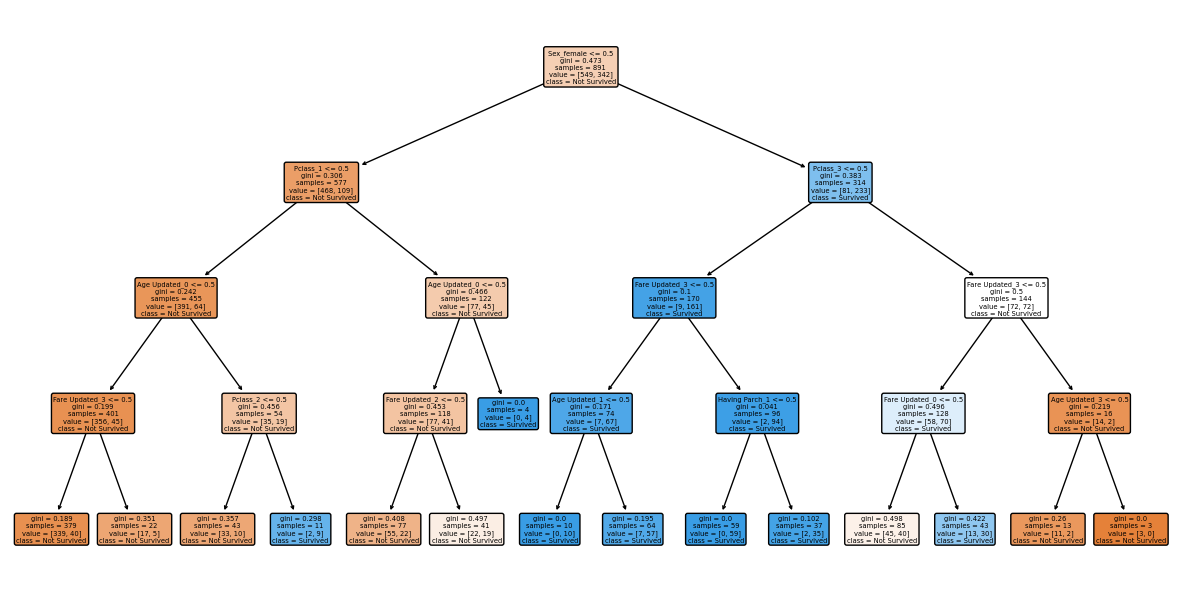

In [264]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt, filled=True ,rounded=True, class_names=['Not Survived', 'Survived'], feature_names=X_encoded_train.columns);

#Output

In [266]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred_final})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
